<a href="https://colab.research.google.com/github/beinganiz/EDA_Data_Analysis/blob/main/diwali_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales-analysis

Use the "Run" button to execute the code.

In [ ]:
url='https://raw.githubusercontent.com/beinganiz/Database/main/Diwali_Sales_Data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [ ]:
df=pd.read_csv(url,encoding='unicode_escape')

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Amount']=df['Amount'].astype('int')

In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
df.rename(columns={'Age Group':'Age_group'},inplace=True)

## EDA

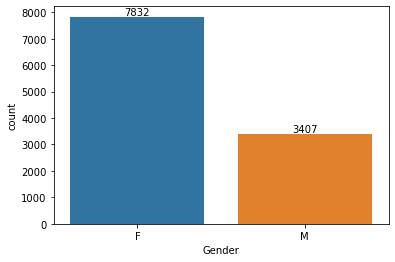

In [ ]:
# plotting a bar chart for Gender and it's count
ax=sea.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


 From Above graph we understand that female purchase more than men

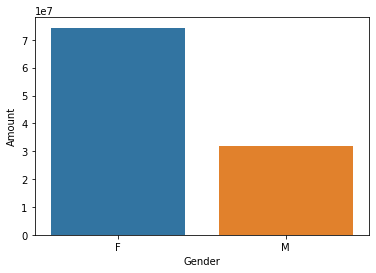

In [ ]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
am=sea.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From Above graph we understand that female purchase more  than men

In [ ]:
age_group_order = df['Age_group'].sort_values(ascending=True)

In [ ]:
# # another way to do
# age_group= sea.countplot(data=df,x='Age_group',hue='Gender')
# for bar in age_group.containers:
#     age_group.bar_label(bar)

In [ ]:
ag=df.groupby(['Gender','Age_group'],as_index=False)['User_ID'].count().sort_values(by=['Age_group','Gender'])

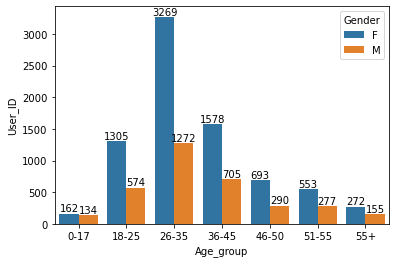

In [ ]:
ax=sea.barplot(data=ag,x='Age_group',y='User_ID',hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)

In [ ]:
age_sls=df.groupby(['Age_group'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

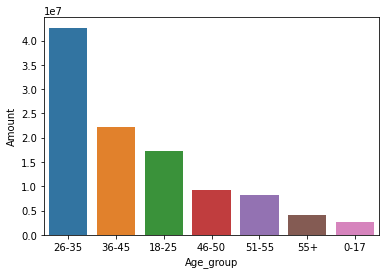

In [ ]:
dg=sea.barplot(data=age_sls,x='Age_group',y='Amount')

in above graph age group 26-35 buy the most

In [ ]:
order_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)[:8]

<AxesSubplot:xlabel='State', ylabel='Orders'>

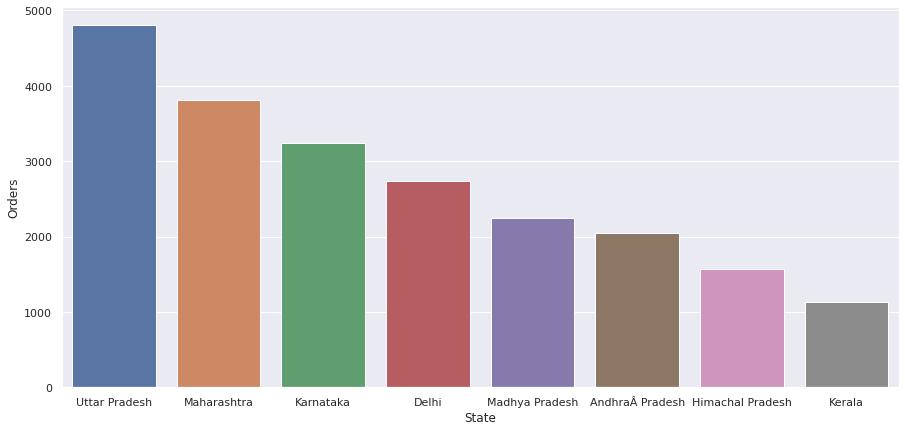

In [ ]:
sea.set(rc={'figure.figsize':(15,7)})
sea.barplot(x='State',y='Orders',data=order_state)

in above graph Uttar Pradesh Orders The Most From All States

In [ ]:
# sea.set(rc={'figure.figsize':(7,5)})
# mar=df.groupby(['Gender','Marital_Status'],as_index='False')['Amount'].sum()


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

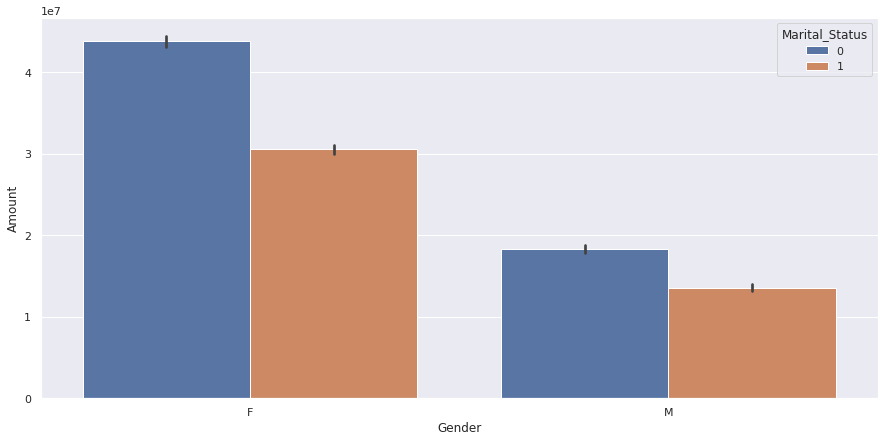

In [ ]:
sea.barplot(data=df, x='Gender', y='Amount', hue='Marital_Status', estimator=sum)

in the above graph female spent more amount in diwali

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

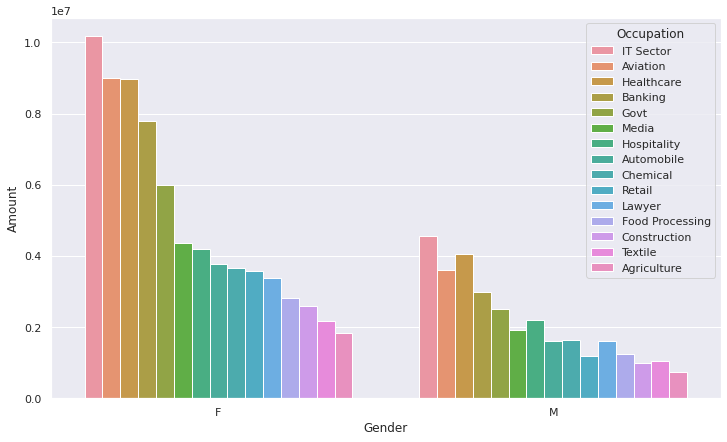

In [ ]:
da =df.groupby(['Gender','Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sea.barplot(data=da,x='Gender',y='Amount',hue='Occupation')

In [ ]:
# #it is not look beacuse it is not away to present
# sea.set(rc={'figure.figsize':(15,7)})
# sea.countplot(data=df,x='Product_Category')

In [ ]:
da=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sea.set(rc={'figure.figsize':(12,7)})

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

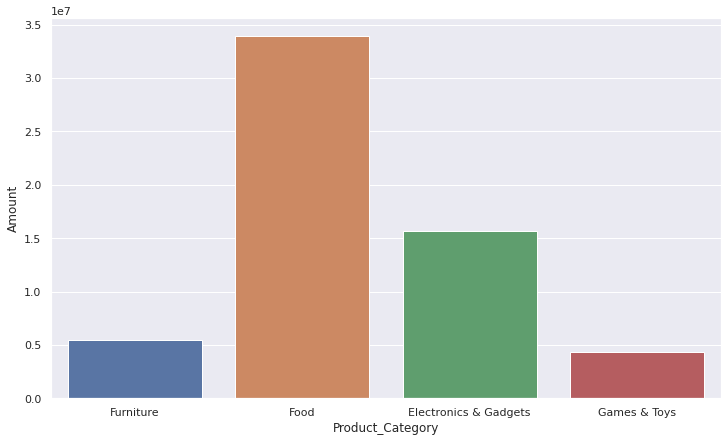

In [ ]:
sea.barplot(data=da,x='Product_Category',y='Amount',order=['Furniture','Food','Electronics & Gadgets','Games & Toys'])

In [ ]:
pd.unique(df['Product_Category'])

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [ ]:
user=df.groupby('User_ID',as_index='False')['Orders'].sum()

In [ ]:
user=user.sort_values( ascending=False)[:10]
